DailyDelhiClimate data 사용
- X: humidity, wind_speed, meanpressure
- y: meantemp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('./drive/MyDrive/DailyDelhiClimateTrain.csv', index_col=0)
test=pd.read_csv('./drive/MyDrive/DailyDelhiClimateTest.csv', index_col=0)

train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df=pd.concat([test, train])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [ ]:
df = MinMaxScaler(df)

dfy = df[['meantemp']]
dfx = df[['humidity', 'wind_speed', 'meanpressure']]

dfx

,humidity,wind_speed,meanpressure
date,,,
2017-01-01,0.836777,0.064981,0.008076
2017-01-02,0.736890,0.068556,0.132943
2017-01-03,0.790796,0.095137,0.132950
2017-01-04,0.654043,0.107650,0.132608
2017-01-05,0.710579,0.078162,0.132430
...,...,...,...
2016-12-28,0.630865,0.084032,0.132590
2016-12-29,0.859736,0.142113,0.132764
2016-12-30,0.880638,0.148429,0.132895


In [ ]:
dfx.describe()

,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000
mean,0.543097,0.163412,0.131943
std,0.196139,0.106839,0.022811
min,0.000000,0.000000,0.000000
25%,0.419554,0.087636,0.130808
50%,0.566144,0.150724,0.131743
75%,0.678012,0.219387,0.132543
max,1.000000,1.000000,1.000000


In [ ]:
dfy.head()

,meantemp
date,
2017-01-01,0.303019
2017-01-02,0.382096
2017-01-03,0.339641
2017-01-04,0.388210
2017-01-05,0.378700


In [ ]:
#시분할
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [ ]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(1566, 10, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1049, 10, 3), (517, 10, 3), (1049, 1), (517, 1))

#DeepLearning

###RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [ ]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            480       
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
#train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
22/22 [==============================] - 2s 15ms/step - loss: 0.3520 - val_loss: 0.1509
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.1604 - val_loss: 0.1283
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1330 - val_loss: 0.0856
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 0.1180 - val_loss: 0.0703
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0941 - val_loss: 0.0598
Epoch 6/500
22/22 [==============================] - 0s 6ms/step - loss: 0.1073 - val_loss: 0.0535
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0858 - val_loss: 0.0381
Epoch 8/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0912 - val_loss: 0.0520
Epoch 9/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0812 - val_loss: 0.0353
Epoch 10/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0797 - val_loss: 0.0385
Epoch 11

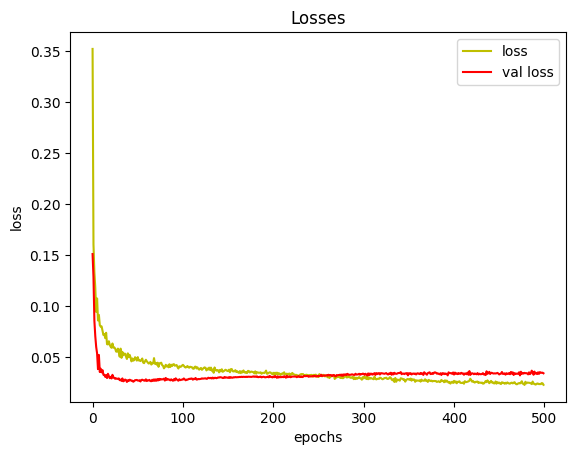

In [ ]:
#loss 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#예측
y_pred = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


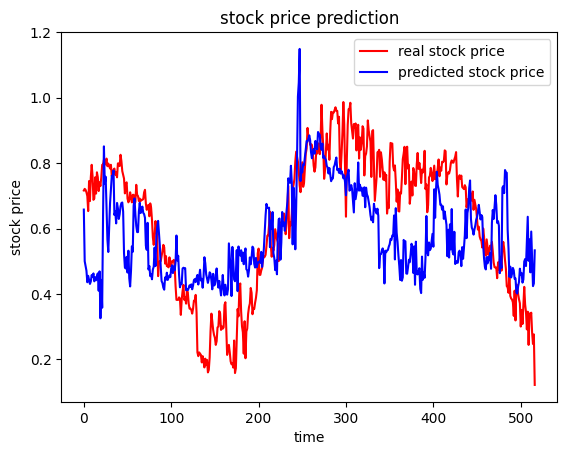

In [ ]:
#예측-실 오차 시각화
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

###LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps, n_features, n_outputs

(10, 3, 1)

In [ ]:
#모델 생성

model = Sequential([
    LSTM(100, input_shape=(n_timesteps,n_features)),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(1)  #Regression에서는 출력범위가 1
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 51801 (202.35 KB)
Trainable params: 51801 (202.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
#train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
22/22 [==============================] - 2s 33ms/step - loss: 0.1809 - val_loss: 0.1064
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1011 - val_loss: 0.0561
Epoch 3/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0755 - val_loss: 0.0442
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0599 - val_loss: 0.0303
Epoch 5/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0557 - val_loss: 0.0259
Epoch 6/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0582 - val_loss: 0.0285
Epoch 7/500
22/22 [==============================] - 0s 9ms/step - loss: 0.0547 - val_loss: 0.0281
Epoch 8/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0516 - val_loss: 0.0266
Epoch 9/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0267
Epoch 10/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0517 - val_loss: 0.0271
Epoch 11

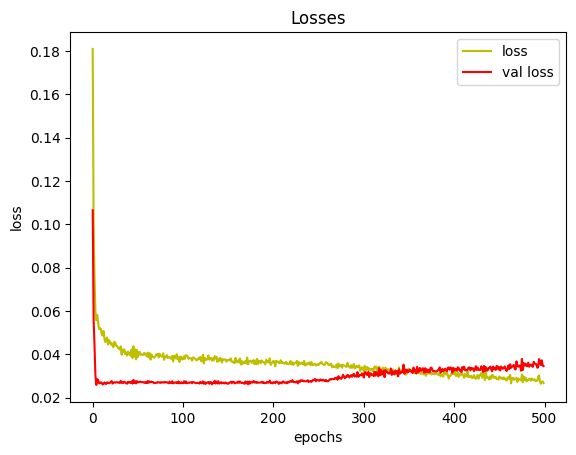

In [ ]:
#loss 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#예측
y_pred = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


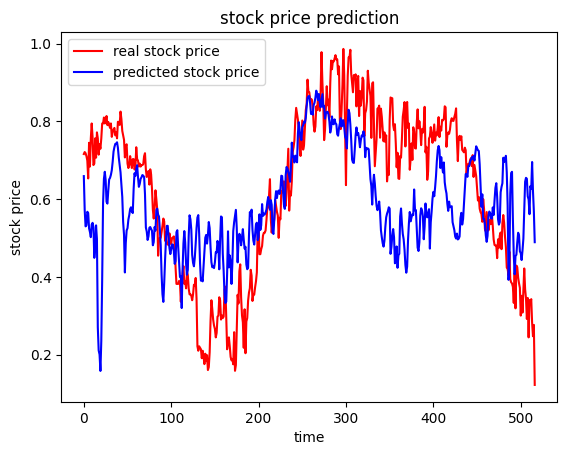

In [ ]:
#예측-실 오차 시각화
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()